In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

co = pd.read_csv(r"D:\Semester 4\Advanced Phase\Data\Mini Projects\AirQuino\Data.csv")

In [2]:
co.Time = pd.to_datetime(co.Date + ' ' + co.Time)
co = co.drop(columns = ['Date'])
co.dtypes

Time      datetime64[ns]
Zone              object
Device            object
PPM                int64
VOC                int64
dtype: object

In [3]:
co['Zone'] = co['Zone'].str.slice(4)
co

,Time,Zone,Device,PPM,VOC
0,2021-12-06 11:42:00,1,T1,442,6
1,2021-12-06 11:42:00,1,T2,455,8
2,2021-12-06 11:44:00,1,T1,475,11
3,2021-12-06 11:44:00,1,T2,478,11
4,2021-12-06 11:44:00,2,T1,1453,160
...,...,...,...,...,...
713,2021-12-06 16:26:00,2,T2,487,13
714,2021-12-06 16:27:00,1,T1,505,15
715,2021-12-06 16:27:00,1,T2,466,10
716,2021-12-06 16:27:00,2,T1,1245,128


In [4]:
d = {'PPM': [], 'VOC': []}
zone1 = pd.DataFrame(data = d)
zone2 = pd.DataFrame(data = d)

zone1 = co.groupby('Zone').get_group("1")
zone2 = co.groupby('Zone').get_group("2")

In [5]:
co.set_index('Time', inplace = True)

Zone
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
Name: VOC, dtype: object

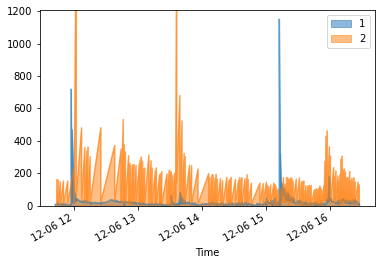

In [6]:
co.groupby('Zone')['VOC'].plot(kind='area', legend=True, stacked=False)

Zone
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
Name: PPM, dtype: object

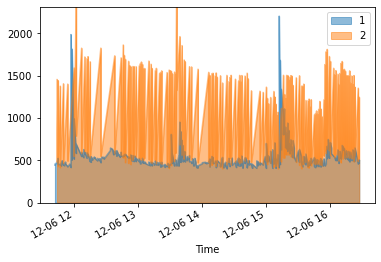

In [14]:
co.groupby('Zone')['PPM'].plot(kind='area', legend=True, stacked=False)

In [8]:
dataZone1 = pd.DataFrame()
dataZone1['Time'] = zone1['Time']
dataZone1['VOC'] = zone1['VOC']
dataZone1['PPM'] = zone1['PPM']

dataZone2 = pd.DataFrame()
dataZone2['Time'] = zone2['Time']
dataZone2['VOC'] = zone2['VOC']
dataZone2['PPM'] = zone2['PPM']

In [9]:
dataZone1.set_index('Time', inplace = True)

<AxesSubplot:ylabel='Time'>

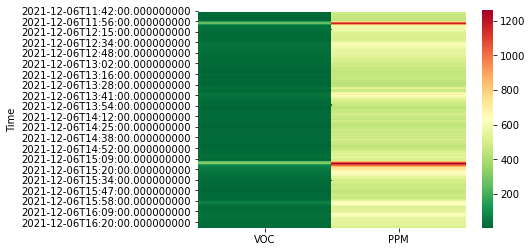

In [15]:
sns.heatmap(dataZone1.rolling(window=5).mean(), cmap='RdYlGn_r')

In [11]:
dataZone2.set_index('Time', inplace = True)

<AxesSubplot:ylabel='Time'>

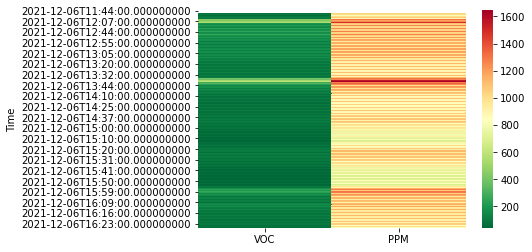

In [16]:
sns.heatmap(dataZone2.rolling(window=5).mean(), cmap='RdYlGn_r')